In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")
file_name = 'Objetos_rota_palmela_Ano_todo'
file_path = os.path.join(downloads_path, f'{file_name}.xlsx')

# Verifique se o arquivo existe antes de tentar abri-lo
if os.path.exists(file_path):
    # Use o pandas para ler o arquivo Excel
    df = pd.read_excel(file_path)

    # Agora você pode trabalhar com o DataFrame 'df'
    print(df.head())
else:
    print(f'O arquivo {file_path} não existe.')
    
%config InlineBackend.figure_format = 'svg'

  data_criacao   giro  n_objetos Rota com Pit stop
0   2023-02-01  2800A        103               Sim
1   2023-02-01  2800B         75               Sim
2   2023-02-01  2800C        110               Sim
3   2023-02-01  2800D         95               Sim
4   2023-02-01  2810A         82               Sim


/var/folders/9n/zs_bd05s47xdjcj6_67tkw7c0000gn/T/ipykernel_28918/4103278807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['data_criacao'] = pd.to_datetime(filtered_data['data_criacao'])
/var/folders/9n/zs_bd05s47xdjcj6_67tkw7c0000gn/T/ipykernel_28918/4103278807.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Mês'] = filtered_data['data_criacao'].dt.to_period('M')


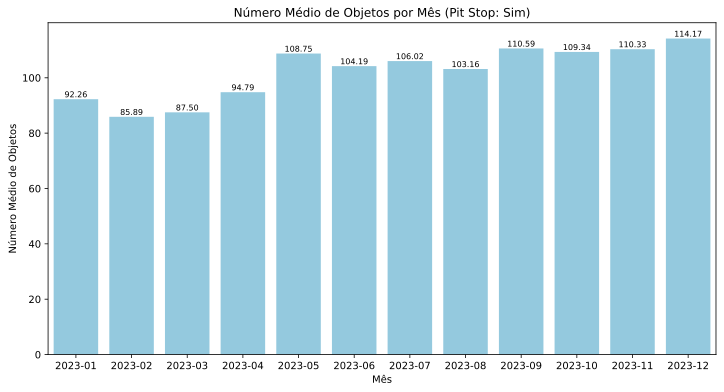

In [3]:
filtered_data = df[df['Rota com Pit stop'] == 'Sim']

# Converter a coluna 'data_criacao' para o tipo datetime
filtered_data['data_criacao'] = pd.to_datetime(filtered_data['data_criacao'])

# Criar uma coluna 'Mês' para facilitar a agregação
filtered_data['Mês'] = filtered_data['data_criacao'].dt.to_period('M')

# Calcular a média de 'n_objetos' por 'Mês'
avg_objetos_por_mes = filtered_data.groupby('Mês')['n_objetos'].mean().reset_index()

# Plotar o gráfico de barras usando Seaborn e adicionar rótulos de valor
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Mês', y='n_objetos', data=avg_objetos_por_mes, color='skyblue')

# Adicionar rótulos de valor nas barras
for index, value in enumerate(avg_objetos_por_mes['n_objetos']):
    barplot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Número Médio de Objetos por Mês (Pit Stop: Sim)')
plt.xlabel('Mês')
plt.ylabel('Número Médio de Objetos')
plt.show()

/var/folders/9n/zs_bd05s47xdjcj6_67tkw7c0000gn/T/ipykernel_12057/916879133.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_name[month] for month in range(1, 13)], rotation=45, ha='right')


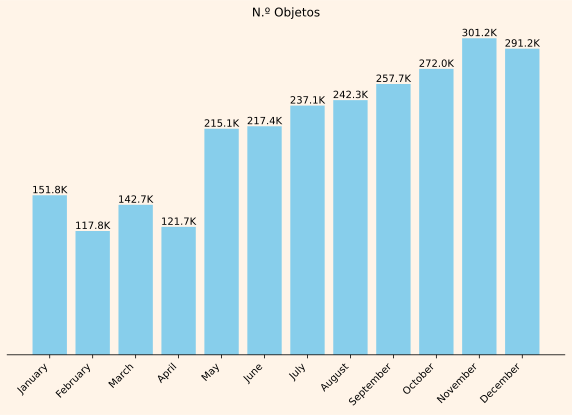

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from calendar import month_name

# Se não estiver usando o estilo de fundo fornecido pelo Matplotlib, você pode defini-lo manualmente
plt.rcParams['axes.facecolor'] = '#fff4e8'

df['data_criacao'] = pd.to_datetime(df['data_criacao'])

# Agrupar por mês e calcular a soma de n_objetos
soma_por_mes = df.groupby(df['data_criacao'].dt.to_period("M"))['n_objetos'].sum()

# Função para formatar os rótulos do eixo y em milhares com uma casa decimal
def format_milhares(value, _):
    return f'{value/1000:.1f}K'

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(soma_por_mes.index.astype(str), soma_por_mes, color='skyblue', edgecolor='none')  # Remova a moldura com edgecolor='none'
ax.set_title('N.º Objetos')
ax.set_yticks([])  # Remova os rótulos do eixo y
ax.set_ylabel('')  # Remova o rótulo do eixo y

# Remova a linha superior e as linhas da grade, mantendo a linha inferior do eixo x
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Adicionar anotações aos gráficos de barras
for i, v in enumerate(soma_por_mes):
    ax.text(i, v + 1, f'{v/1000:.1f}K', ha='center', va='bottom')

# Ajustar o formato dos rótulos do eixo y
ax.yaxis.set_major_formatter(FuncFormatter(format_milhares))

# Ajustar rótulos no eixo x para mostrar os meses em português
ax.set_xticklabels([month_name[month] for month in range(1, 13)], rotation=45, ha='right')

# Definir a cor de fundo da figura
fig.patch.set_facecolor('#fff4e8')

plt.show()


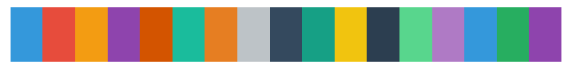

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array

fixed_colors = ["#3498DB", "#E74C3C", "#F39C12", "#8E44AD",
                "#D35400", "#1ABC9C", "#E67E22", "#BDC3C7", "#34495E",
                "#16A085", "#F1C40F", "#2C3E50", "#58D68D", "#AF7AC5",
                "#3498DB", "#27AE60", "#8E44AD"]

rgba_colors = to_rgba_array(fixed_colors)

fig, ax = plt.subplots(figsize=(10, 1))
ax.imshow([rgba_colors], aspect='auto', extent=[0, len(fixed_colors), 0, 1])
ax.axis('off')

plt.show()


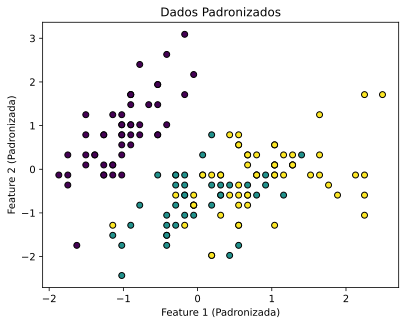

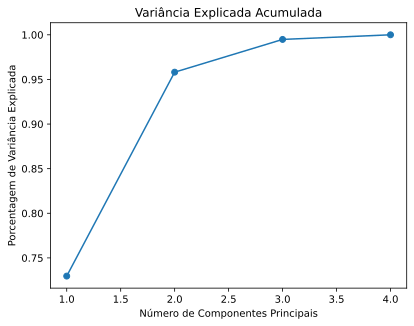

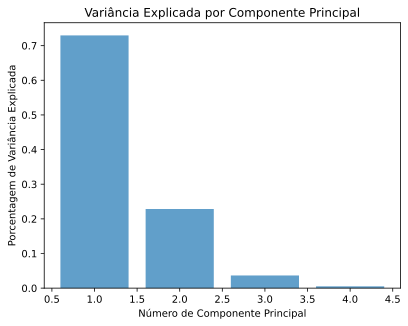

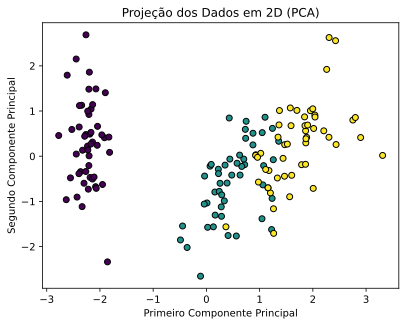

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Carregar o conjunto de dados Iris
iris = load_iris()
data = iris.data
columns = [f"Feature {i+1}" for i in range(data.shape[1])]
df = pd.DataFrame(data, columns=columns)
target = iris.target

# Passo 1: Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Gráfico: Dados Padronizados
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=target, cmap='viridis', edgecolors='k')
plt.title('Dados Padronizados')
plt.xlabel('Feature 1 (Padronizada)')
plt.ylabel('Feature 2 (Padronizada)')
plt.show()

# Passo 2: Ajustar o PCA aos dados padronizados
pca = PCA()
pca.fit(data_scaled)

# Gráfico: Variância explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Variância Explicada Acumulada')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Porcentagem de Variância Explicada')
plt.show()

# Gráfico: Variância explicada por componente
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.title('Variância Explicada por Componente Principal')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Porcentagem de Variância Explicada')
plt.show()

# Passo 3: Reduzir a dimensionalidade para 2 componentes principais
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data_scaled)

# Gráfico: Projeção dos dados em 2D
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=target, cmap='viridis', edgecolors='k')
plt.title('Projeção dos Dados em 2D (PCA)')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.show()

%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Carregar o conjunto de dados Iris
iris = load_iris()
data = iris.data
columns = [f"Feature {i+1}" for i in range(data.shape[1])]
df = pd.DataFrame(data, columns=columns)
target = iris.target

# Passo 1: Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Gráfico: Dados Padronizados
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=target, cmap='viridis', edgecolors='k')
plt.title('Dados Padronizados')
plt.xlabel('Feature 1 (Padronizada)')
plt.ylabel('Feature 2 (Padronizada)')
plt.show()

# Passo 2: Ajustar o PCA aos dados padronizados
pca = PCA()
pca.fit(data_scaled)

# Bartlett's Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
print(f"Bartlett's Test of Sphericity - Chi-Square Value: {chi_square_value}")
print(f"Bartlett's Test of Sphericity - P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis. Variables are correlated.")
else:
    print("Fail to reject the null hypothesis. Variables are not significantly correlated.")

# KMO Measure
kmo_all, kmo_model = calculate_kmo(data_scaled)
print(f"KMO Measure - Overall: {kmo_all}")
print(f"KMO Measure - Per Variable: {kmo_model}")
if kmo_all > 0.6:
    print("KMO value suggests adequacy for PCA.")
else:
    print("KMO value suggests inadequacy for PCA.")

# Gráfico: Variância explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Variância Explicada Acumulada')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Porcentagem de Variância Explicada')
plt.show()

# Gráfico: Variância explicada por componente
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.title('Variância Explicada por Componente Principal')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Porcentagem de Variância Explicada')
plt.show()

# Passo 3: Reduzir a dimensionalidade para 2 componentes principais
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data_scaled)

# Gráfico: Projeção dos dados em 2D
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=target, cmap='viridis', edgecolors='k')
plt.title('Projeção dos Dados em 2D (PCA)')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.show()

%config InlineBackend.figure_format = 'svg'


ModuleNotFoundError: No module named 'factor_analyzer'

In [8]:
import spacy

# Carregar o modelo NER do spaCy
nlp = spacy.load("en_core_web_sm")

# Texto de exemplo
texto = "RUA VISCONDE DA LUZ , 64"

# Processar o texto com o modelo NER
doc = nlp(texto)

# Iterar sobre as entidades identificadas
for entidade in doc.ents:
    print(entidade.text, entidade.label_)


RUA VISCONDE DA LUZ ORG
64 CARDINAL
